# Compute g-functions using pygfunction

g-functions are response functions that are used for the design of borehole fields. These functions describe the response temperature of a borehole field in parallel arrangement when a step heat is injected into the field. The library *pygfunction* contains state of the art routines for their computation. 

In [123]:
import pygfunction as gt
import numpy as np

To start our computation we need to define the time at which the g-function computation should be performed and the borehole field configuration. 

The time is in seconds and we will be interested in exploring the value of this function over a broad range of scales from few hours to several years. In this case I choose to explore the values of the function between 1e3 second, which is less than half hour, to 1e9 which is more than 30 years.

We then need to to provide the configuration of the borehole field. In this case we look at rectangular field patterns. N_1 and N_2 describe how many boreholes per rows and colums there are. B_1 and B_2 is the spacing in meter between adiacent rows and columns. H is the active length of the borehole, D is the burried depth (not relevant at the moment), and r_b is the borehole diameter. 

In [129]:
time = np.array([1e3,1e4,1e5,1e6,1e7,1e8,1e9])
boreField = gt.boreholes.rectangle_field(N_1=3, N_2=3, B_1=5., B_2=5., H=120., D=4., r_b=0.075)

We can look at the boreField object and see that is an array of Borehole objects with specified geometrical features and position.

In [132]:
boreField

[Borehole(H=120.0, D=4.0, r_b=0.075, x=0.0, y=0.0, tilt=0.0, orientation=-2.356194490192345),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=5.0, y=0.0, tilt=0.0, orientation=-1.5707963267948966),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=10.0, y=0.0, tilt=0.0, orientation=-0.7853981633974483),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=0.0, y=5.0, tilt=0.0, orientation=3.141592653589793),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=5.0, y=5.0, tilt=0.0, orientation=0.0),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=10.0, y=5.0, tilt=0.0, orientation=0.0),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=0.0, y=10.0, tilt=0.0, orientation=2.356194490192345),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=5.0, y=10.0, tilt=0.0, orientation=1.5707963267948966),
 Borehole(H=120.0, D=4.0, r_b=0.075, x=10.0, y=10.0, tilt=0.0, orientation=0.7853981633974483)]

We can the compute our gfunction for this field. This is done using the function gfunction.gFunction. This function takes as argument the boreField geometry (an array of Borehole objects), the thermal diffusivity of the ground alpha, and the time at which the computation is performed.

In [133]:
gFunc = gt.gfunction.gFunction(boreField, alpha=1.0e-6, time=time)

In order to se the value of the function we need to use the function evaluate_g_function

In [119]:
gFunc.evaluate_g_function(time)

array([ 0.05754765,  0.75968631,  1.84805234,  2.98638092,  4.81622423,
       10.56584797, 17.17608665])

The function can be evaluated also at a different time compared to the one that was initially used in the computation.

In [135]:
gFunc.evaluate_g_function([2e4,2e6])

array([1.07253082, 3.34260571])

We can also used the convenience function visualize_g_function() to plot the funcion.

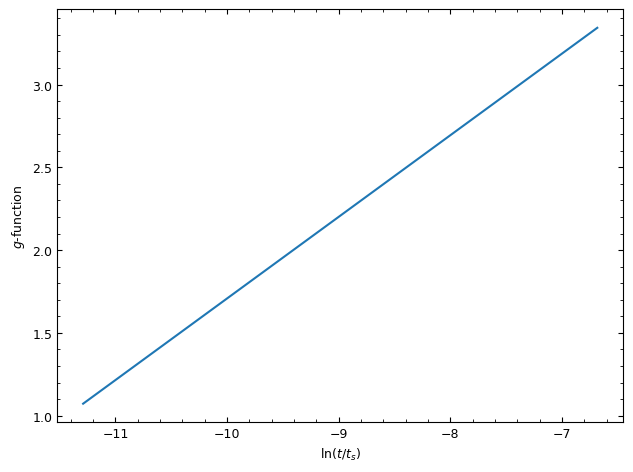

In [136]:
gFunc.visualize_g_function();